<a href="https://colab.research.google.com/github/himansu9805/machine_learning/blob/main/National_Anthem_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anthems.csv to anthems (1).csv


In [ ]:
# 1. Loading the data
import pandas as pd
df = pd.read_csv("anthems.csv")

In [ ]:
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [ ]:
# 2. Exporing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


In [ ]:
documents = df["Anthem"].values.astype("U")

In [ ]:
# 3. Preprocessing of data

import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
document_word_token = []
for document in documents:
  document_word_token.append(RegexpTokenizer(r'\w+').tokenize(document))

stop_words = set(stopwords.words('english'))

wordnet_lemmatizer = WordNetLemmatizer()

filtered_document = []
for document in document_word_token:
  filtered_sentence = ""
  word_list = []
  for word in document:
    if word not in stop_words:
      word_list.append(word)
      for w in word_list:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        if len(filtered_sentence) == 0:
          filtered_sentence += word3
        else:
          filtered_sentence += " " + word3
  filtered_document.append(filtered_sentence)

filtered_document = np.asarray(filtered_document)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(filtered_document)

In [ ]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=50, n_init=5)
model.fit(features)

KMeans(max_iter=50, n_clusters=5, n_init=5)

In [ ]:
df['Cluster'] = model.labels_
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,Cluster
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",1
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",1
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",1
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",4
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",1


In [ ]:
print("Cluster centroids:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
  print("Cluster %d:" % i)
  for j in order_centroids[i, :20]:
    print(' %s ' % terms[j])
  print('-----------')

Cluster centroids:

Cluster 0:
 people 
 fatherland 
 shall 
 independence 
 world 
 soul 
 land 
 live 
 blood 
 light 
 peace 
 thousand 
 africa 
 love 
 arm 
 witness 
 lao 
 immortal 
 heart 
 german 
-----------
Cluster 1:
 land 
 thou 
 high 
 people 
 blessed 
 country 
 sacred 
 free 
 god 
 symbol 
 oh 
 warrior 
 independent 
 awake 
 glory 
 long 
 king 
 live 
 rise 
 flag 
-----------
Cluster 2:
 homeland 
 god 
 bless 
 nation 
 land 
 freedom 
 free 
 hail 
 oh 
 let 
 live 
 heart 
 make 
 long 
 unity 
 lord 
 thee 
 glory 
 forever 
 sing 
-----------
Cluster 3:
 arise 
 let 
 blood 
 new 
 flag 
 slave 
 great 
 die 
 freedom 
 people 
 unite 
 land 
 roar 
 happiness 
 raise 
 proud 
 march 
 glory 
 refuse 
 time 
-----------
Cluster 4:
 thy 
 thee 
 country 
 land 
 old 
 salute 
 thou 
 love 
 glory 
 thine 
 hope 
 light 
 beloved 
 stand 
 god 
 restore 
 divinely 
 liberty 
 heaven 
 mother 
-----------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.loc[df['Country'] == "India"]

,Country,Alpha-2,Alpha-3,Continent,Anthem,Cluster
97,India,IN,IND,Asia,"Thou art the ruler of the minds of all people,...",4


In [212]:
cluster_0 = df.loc[df['Cluster'] == 0]["Alpha-2"].str.lower().values.tolist()
cluster_1 = df.loc[df['Cluster'] == 1]["Alpha-2"].str.lower().values.tolist()
cluster_2 = df.loc[df['Cluster'] == 2]["Alpha-2"].str.lower().values.tolist()
cluster_3 = df.loc[df['Cluster'] == 3]["Alpha-2"].str.lower().values.tolist()
cluster_4 = df.loc[df['Cluster'] == 4]["Alpha-2"].str.lower().values.tolist()

In [234]:
# A. World Map

import pygal
from pygal.style import Style
from pygal_maps_world.maps import World
  
custom_style = Style(colors = ('#A2FAA3', '#92C9B1', '#4F759B' , '#5D5179', '#571F4E'))
  
worldmap =  World(style = custom_style)

worldmap.title = 'Classification of National Anthems in the world into 5 clusters'

worldmap.add('Cluster 1', cluster_0)
worldmap.add('Cluster 2', cluster_1)
worldmap.add('Cluster 3', cluster_2)
worldmap.add('Cluster 4', cluster_3)
worldmap.add('Cluster 5', cluster_4)

worldmap.render_to_file('classification_result.svg')

print("Success")

Success


In [229]:
# B. Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [230]:
def get_anthem_data(cluster_number):
  cluster_anthems = ""
  anthems = df.loc[df['Cluster'] == cluster_number]["Anthem"].str.lower().values.tolist()
  for anthem in anthems:
    cluster_anthems += anthem
  return cluster_anthems

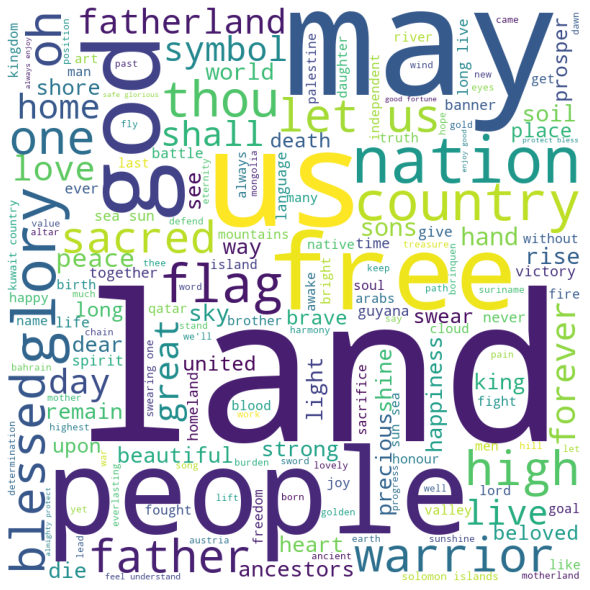

In [235]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(get_anthem_data(1))                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()